In [1]:


# Loan Default Prediction:
# Problem: Predict whether a loan will default or not based on the given features.
# Question: Can we build a model that accurately predicts the likelihood of loan default using applicant information?

# Risk Assessment:
# Problem: Assess the risk associated with granting a loan to an individual.
# Question: How can we evaluate the risk of lending money to an applicant, considering factors like credit score, debt-to-income ratio, and employment type?

# Interest Rate Determination:
# Problem: Determine the factors influencing the interest rate for a loan application.
# Question: What variables contribute significantly to the interest rate, and can we establish a formula to predict it based on applicant characteristics?

# Loan Approval Criteria:
# Problem: Identify the key criteria for loan approval.
# Question: What factors (income, credit score, employment type, etc.) play a crucial role in deciding whether a loan application should be approved or rejected?

# Demographic Analysis:
# Problem: Understand the demographic trends of loan applicants.
# Question: How does age, income, education, and marital status vary among individuals applying for loans?

# Impact of Co-Signers:
# Problem: Evaluate the impact of having a co-signer on loan approval and default rates.
# Question: Does having a co-signer correlate with higher approval rates or a lower likelihood of default?

# Loan Purpose Analysis:
# Problem: Analyze the distribution of loan purposes and their correlation with other factors.
# Question: What are the most common purposes for taking out loans, and how do these purposes relate to applicant characteristics?

# Load Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
import seaborn as sns

# Collect Data

In [4]:
# Search on Kaggle:

# Visit Kaggle's website (https://www.kaggle.com/).
# Use the search bar to look for loan default datasets. You might use keywords like "loan default," "credit risk," or "default prediction."
# Select a Relevant Dataset:

# Browse through the search results and select a dataset that matches your interests or requirements.
# Download and Explore the Dataset:

# Download the selected dataset and explore its contents. Pay attention to the columns, data types, and any accompanying documentation.

#Summary of Loan Default Dataset:

# Columns: Identify the columns present in the dataset. Common columns may include features such as age, income, loan amount, credit score, employment details, and whether a loan defaulted or not.

# Target Variable: Determine the target variable, which is likely to be a binary variable indicating loan default (e.g., 1 for default, 0 for non-default).

# Features: Explore the features that might influence loan default, such as credit score, debt-to-income ratio, employment history, and others.

# Data Distribution: Check the distribution of the target variable and key features. Understanding the balance or imbalance in the dataset is crucial for modeling.

# Data Quality: Assess the quality of the data, checking for missing values, outliers, or any data preprocessing that might be required.

# Documentation: If available, refer to any documentation provided with the dataset for additional insights into its origin, collection methods, and any specific considerations.

# Potential Analysis:Consider potential analyses or tasks you could perform with the dataset, such as building a predictive model for loan default,
# identifying key factors influencing default, or exploring patterns based on different demographic factors.

In [5]:
# Columns Details:

# LoanID: Unique identifier for each loan application.
# Age: Age of the individual applying for the loan.
# Income: Income of the individual applying for the loan.
# LoanAmount: The amount of money requested in the loan application.
# CreditScore: The credit score of the individual applying for the loan.
# MonthsEmployed: Number of months the individual has been employed.
# NumCreditLines: Number of credit lines (credit cards, loans, etc.) the individual currently has.
# InterestRate: The interest rate associated with the loan.
# LoanTerm: The duration of the loan in months or years.
# DTIRatio (Debt-to-Income Ratio): The ratio of the individual's debt payments to their overall income.
# Education: The educational level of the individual applying for the loan.
# EmploymentType: The type of employment (e.g., full-time, part-time, self-employed).
# MaritalStatus: The marital status of the individual.
# HasMortgage: Whether the individual has a mortgage.
# HasDependents: Whether the individual has dependents.
# LoanPurpose: The purpose for which the loan is being requested (e.g., home purchase, education, etc.).
# HasCoSigner: Whether there is a co-signer for the loan.
# Default: Binary indicator (1 or 0) representing whether the loan has defaulted (1) or not (0).

In [6]:
data=pd.read_csv('Loan_default.csv')

In [7]:
data.shape

(255347, 18)

In [8]:
# The dataset, sourced from Kaggle, focuses on loan default prediction. Comprising various features such as age, income, credit score, and employment details,
# it includes a binary target variable indicating loan default status. With a substantial size, the dataset's complexity necessitates working with a manageable subset.
# A random selection of 5000 rows was made for analysis. Initial exploration involves assessing feature distributions, data quality, and potential predictive modeling for loan default. 
# This subset approach allows for efficient data processing and modeling, balancing computational efficiency without sacrificing meaningful insights into credit risk assessment.

In [9]:
df=data.sample(5000)

In [10]:
df.head()

LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
211519  XELAY5WCZ6   34  125320       43389          847             103   
123285  3LSXG552TW   22   24955      113715          380              34   
164113  GC2IWUUWS9   26   30987       55314          341              20   
133070  OPQISYCEVE   55   34379       31407          436              14   
140642  QV713W4WYH   66  121588      170414          531              18   

        NumCreditLines  InterestRate  LoanTerm  DTIRatio   Education  \
211519               2         16.23        36      0.88         PhD   
123285               1         14.71        48      0.56    Master's   
164113               2         16.18        36      0.40         PhD   
133070               4         14.74        48      0.30  Bachelor's   
140642               3         10.84        60      0.47  Bachelor's   

       EmploymentType MaritalStatus HasMortgage HasDependents LoanPurpose  \
211519  Self-employed        Single         Yes            No        Auto   
123285      Full-time      Divorced         Yes            No   Education   
164113     Unemployed        Single         Yes            No    Business   
133070  Self-employed      Divorced          No            No        Home   
140642      Full-time        Single         Yes           Yes   Education   

       HasCoSigner  Default  
211519         Yes        0  
123285          No        1  
164113          No        1  
133070         Yes        0  
140642         Yes        0

In [11]:
df.shape

(5000, 18)

In [12]:
df.isna().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [13]:
#statstics
df.describe()

Age         Income     LoanAmount  CreditScore  MonthsEmployed  \
count  5000.000000    5000.000000    5000.000000  5000.000000     5000.000000   
mean     43.130000   81892.165000  127507.044000   573.931400       60.191800   
std      14.867525   39301.679914   71444.844525   158.616752       34.673758   
min      18.000000   15020.000000    5075.000000   300.000000        0.000000   
25%      30.000000   47194.000000   65538.000000   437.000000       31.000000   
50%      43.000000   81512.500000  128000.500000   578.000000       61.000000   
75%      56.000000  116027.000000  190347.250000   708.000000       90.000000   
max      69.000000  149961.000000  249981.000000   849.000000      119.000000   

       NumCreditLines  InterestRate     LoanTerm     DTIRatio      Default  
count     5000.000000   5000.000000  5000.000000  5000.000000  5000.000000  
mean         2.510000     13.340752    36.076800     0.500482     0.115800  
std          1.117385      6.662207    17.004303     0.232198     0.320017  
min          1.000000      2.000000    12.000000     0.100000     0.000000  
25%          2.000000      7.580000    24.000000     0.300000     0.000000  
50%          3.000000     13.250000    36.000000     0.500000     0.000000  
75%          4.000000     19.092500    48.000000     0.700000     0.000000  
max          4.000000     24.990000    60.000000     0.900000     1.000000

In [14]:
#drop column
df.drop('LoanID',axis=1,inplace=True)

In [15]:
# informetion about the data.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 211519 to 194762
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             5000 non-null   int64  
 1   Income          5000 non-null   int64  
 2   LoanAmount      5000 non-null   int64  
 3   CreditScore     5000 non-null   int64  
 4   MonthsEmployed  5000 non-null   int64  
 5   NumCreditLines  5000 non-null   int64  
 6   InterestRate    5000 non-null   float64
 7   LoanTerm        5000 non-null   int64  
 8   DTIRatio        5000 non-null   float64
 9   Education       5000 non-null   object 
 10  EmploymentType  5000 non-null   object 
 11  MaritalStatus   5000 non-null   object 
 12  HasMortgage     5000 non-null   object 
 13  HasDependents   5000 non-null   object 
 14  LoanPurpose     5000 non-null   object 
 15  HasCoSigner     5000 non-null   object 
 16  Default         5000 non-null   int64  
dtypes: float64(2), int64(8), object

In [16]:
# ckeck data look like
df.head().reset_index()

index  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  211519   34  125320       43389          847             103   
1  123285   22   24955      113715          380              34   
2  164113   26   30987       55314          341              20   
3  133070   55   34379       31407          436              14   
4  140642   66  121588      170414          531              18   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio   Education  \
0               2         16.23        36      0.88         PhD   
1               1         14.71        48      0.56    Master's   
2               2         16.18        36      0.40         PhD   
3               4         14.74        48      0.30  Bachelor's   
4               3         10.84        60      0.47  Bachelor's   

  EmploymentType MaritalStatus HasMortgage HasDependents LoanPurpose  \
0  Self-employed        Single         Yes            No        Auto   
1      Full-time      Divorced         Yes            No   Education   
2     Unemployed        Single         Yes            No    Business   
3  Self-employed      Divorced          No            No        Home   
4      Full-time        Single         Yes           Yes   Education   

  HasCoSigner  Default  
0         Yes        0  
1          No        1  
2          No        1  
3         Yes        0  
4         Yes        0

# Find Outlires

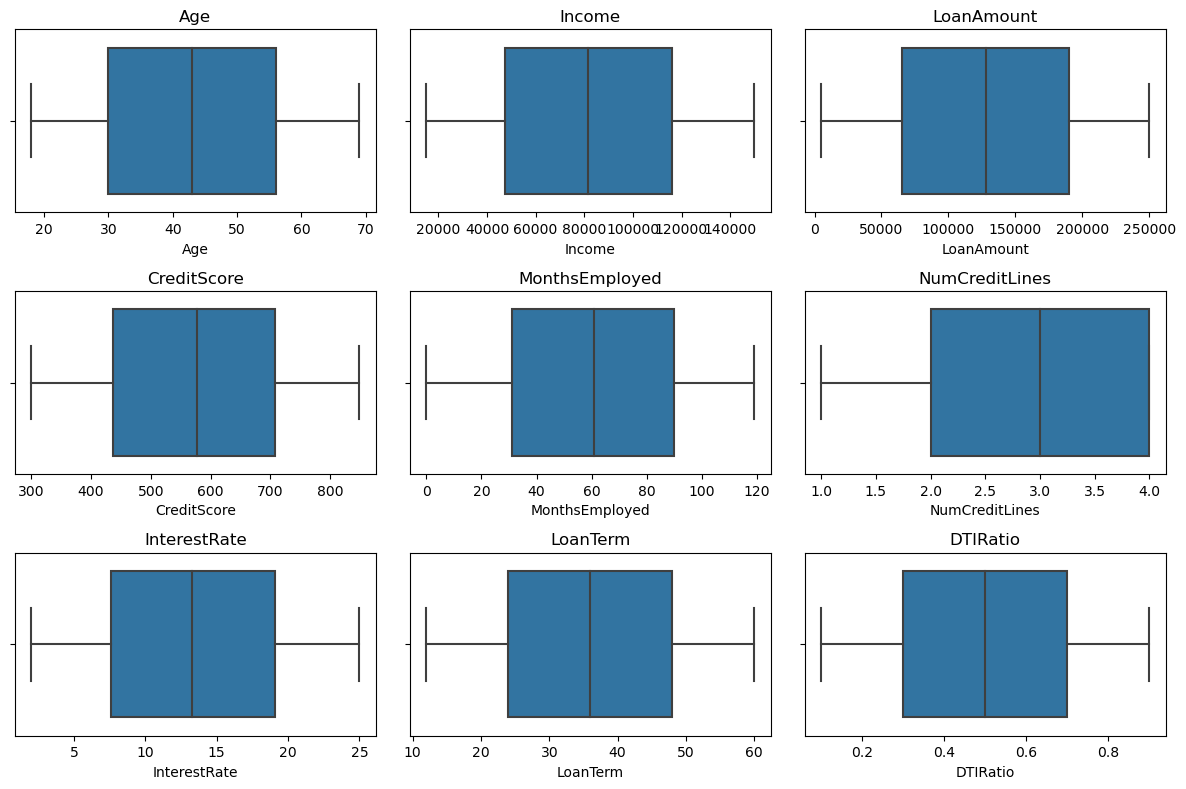

In [17]:
numeric_cols = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']

plt.figure(figsize=(12, 8))
for i, column in enumerate(numeric_cols, 1): 
    plt.subplot(3, 3, i)  # Adjusted to 3 rows for better layout
    sns.boxplot(x=df[column])
    plt.title(column)  # Add title to each subplot 

plt.tight_layout()#This line ensures that the subplots are properly spaced and do not overlap.
plt.show()

#loop iterates over each numeric column in numeric_cols. 
# The enumerate function returns both the index (i) and the value (column) of each item in numeric_cols.

In [18]:
# Check the all columns categeory,how many times repeat

In [19]:
df['Education'].value_counts()

Education
Bachelor's     1271
PhD            1269
Master's       1241
High School    1219
Name: count, dtype: int64

In [20]:
#cheack minimum loan amount
min=np.min(df['LoanAmount'])
print('minimum loan amount',min)

minimum loan amount 5075


In [21]:
#cheack maximum loan amount
max=np.max(df['LoanAmount'])
print('maximum loan amount',max)

maximum loan amount 249981


In [22]:
df['EmploymentType'].value_counts()

EmploymentType
Part-time        1270
Full-time        1254
Self-employed    1252
Unemployed       1224
Name: count, dtype: int64

In [23]:
df['MaritalStatus'].value_counts()

MaritalStatus
Single      1686
Married     1666
Divorced    1648
Name: count, dtype: int64

In [24]:
df['LoanPurpose'].value_counts()

LoanPurpose
Education    1025
Business     1013
Auto         1005
Home          987
Other         970
Name: count, dtype: int64

In [25]:
df['Default'].value_counts()

Default
0    4421
1     579
Name: count, dtype: int64

In [26]:
df['EmploymentType'].value_counts()

EmploymentType
Part-time        1270
Full-time        1254
Self-employed    1252
Unemployed       1224
Name: count, dtype: int64

# Explore Data Analysis (EDA)

In [27]:
# Pair Plot:
# Use a pair plot to visualize pairwise relationships between numerical variables.

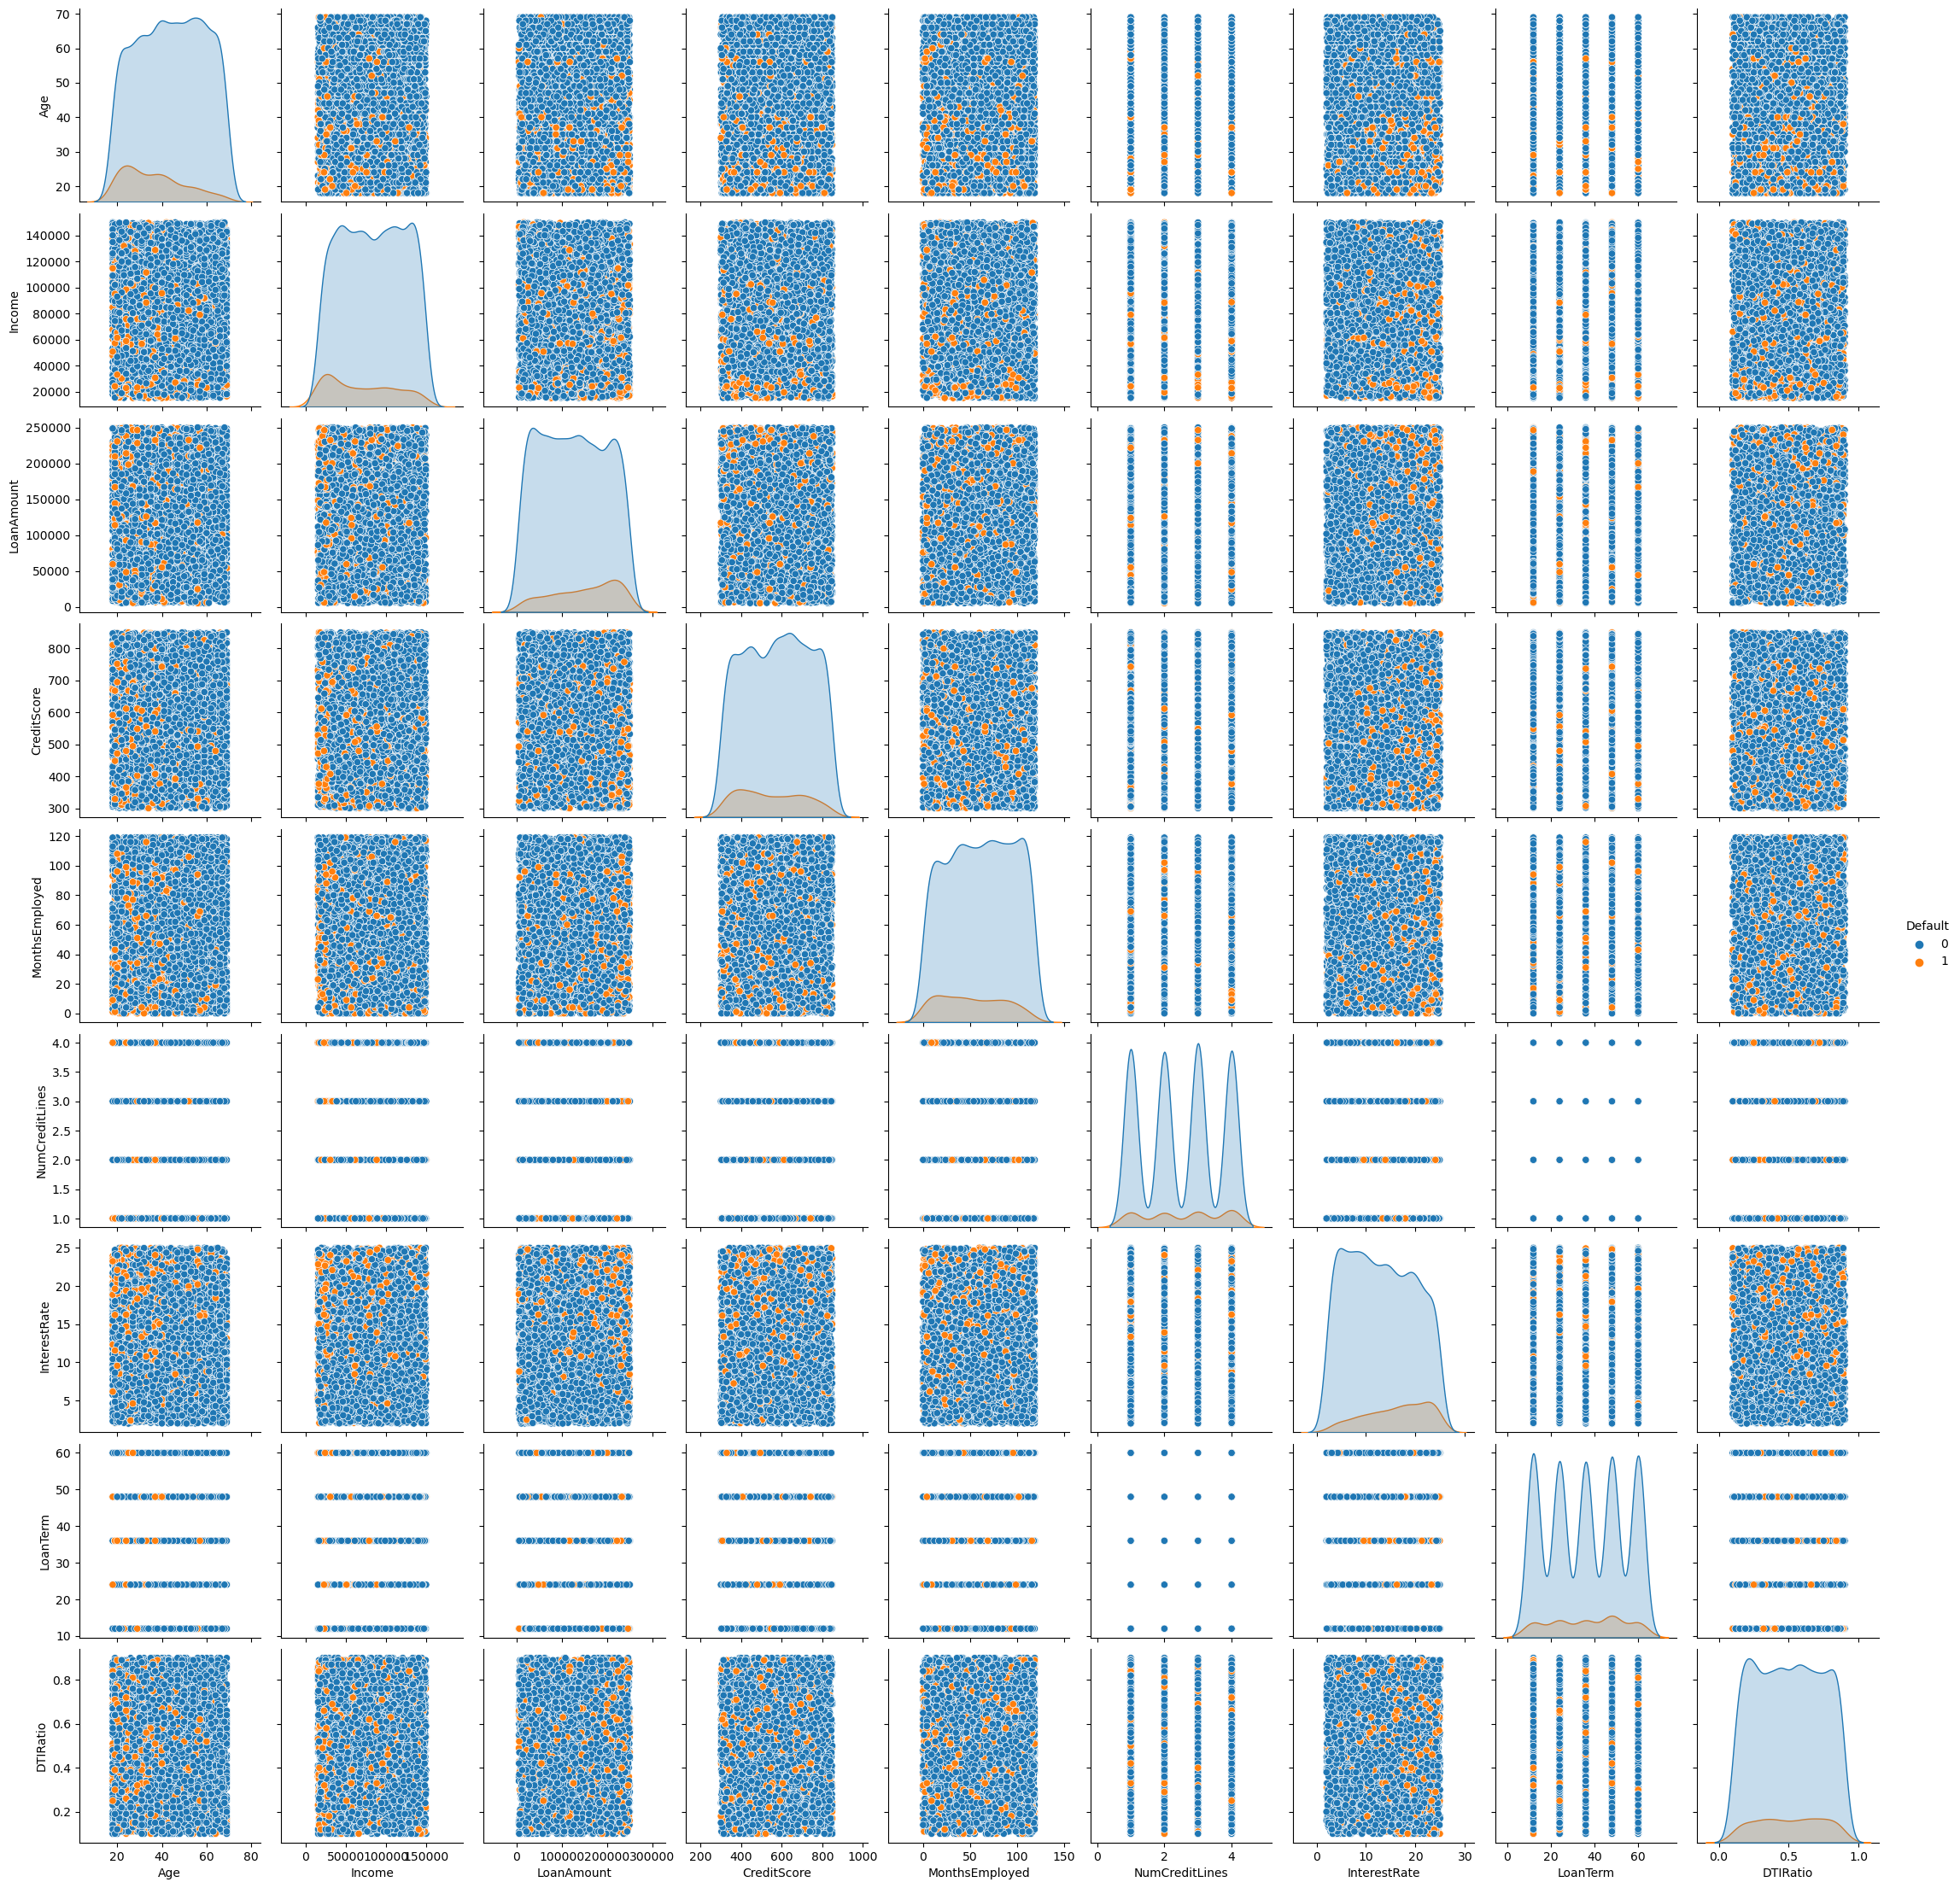

In [28]:
sns.pairplot(df, hue='Default')
plt.show()

In [29]:
# Correlation Heatmap:
# Visualize the correlation between numerical variables, helping identify hidden relationships.
# It is useful for understanding how changes in one variable relate to changes in another.

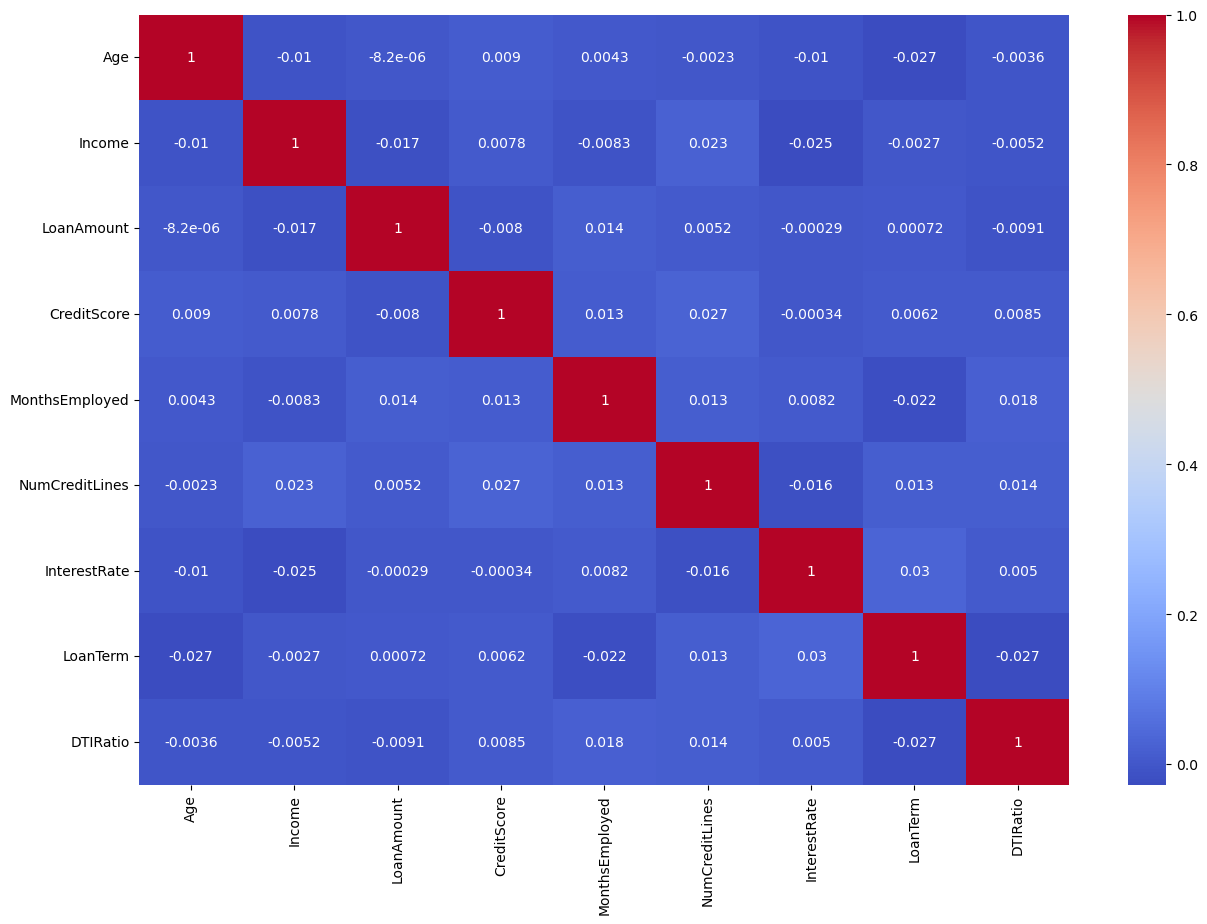

In [30]:
numeric_cols = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']
plt.figure(figsize=(15, 10))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [31]:
# Count Plot:
# A count plot can be used to compare the frequency of different categories in a categorical variable.
# It helps to understand the distribution of categorical variables.

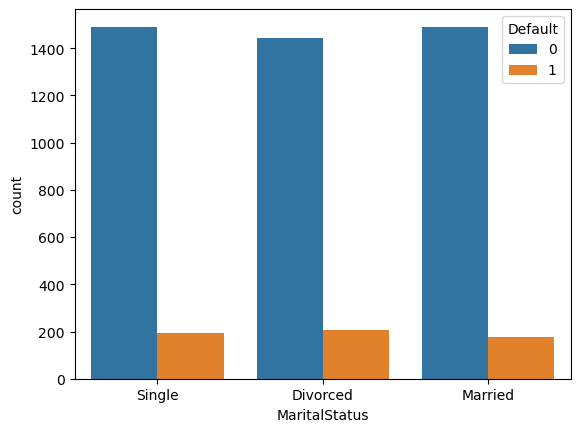

In [32]:
sns.countplot(x='MaritalStatus',hue='Default', data=df)
plt.show()

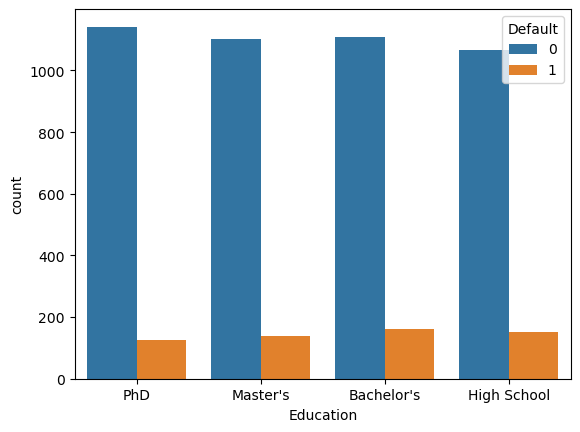

In [33]:
sns.countplot(x='Education',hue='Default', data=df)
plt.show()

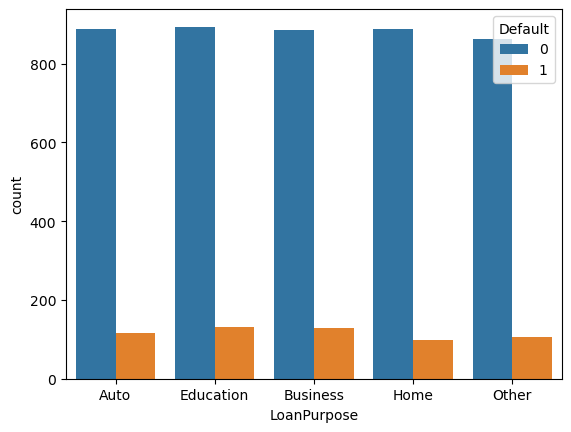

In [34]:
sns.countplot(x='LoanPurpose',hue='Default', data=df)
plt.show()

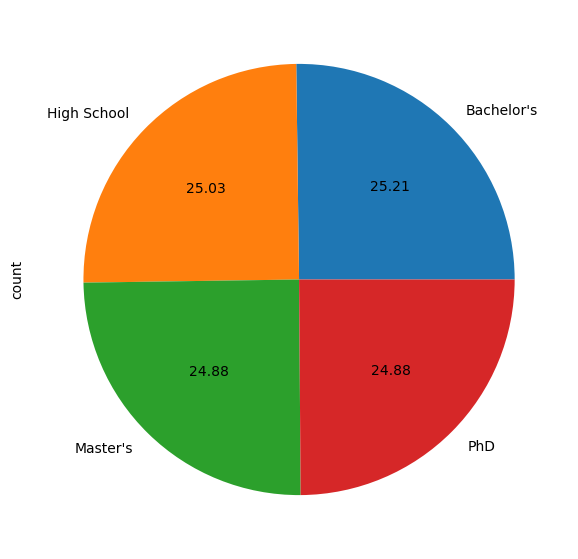

In [35]:
plt.figure(figsize=(7,7))
data['Education'].value_counts().plot(kind='pie',autopct='%.2f')
plt.show()

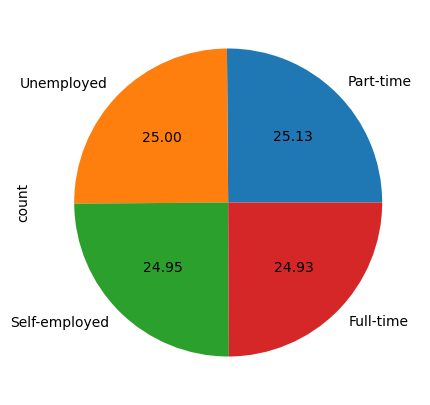

In [36]:
plt.figure(figsize=(5,5))
data['EmploymentType'].value_counts().plot(kind='pie',autopct='%.2f')
plt.show()

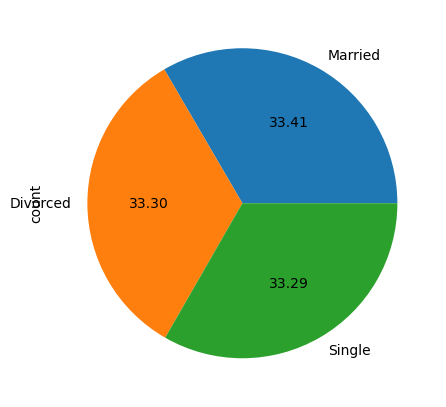

In [37]:
plt.figure(figsize=(5,8))
data['MaritalStatus'].value_counts().plot(kind='pie',autopct='%.2f')
plt.show()


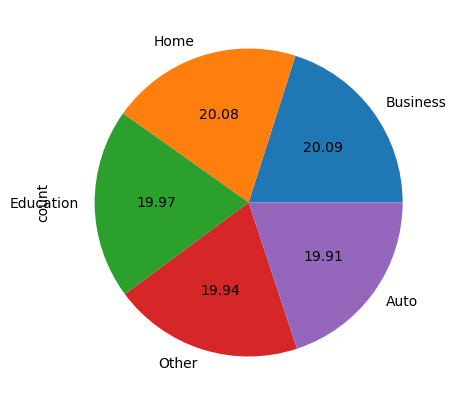

In [38]:
plt.figure(figsize=(5,5))
data['LoanPurpose'].value_counts().plot(kind='pie',autopct='%.2f')
plt.show()

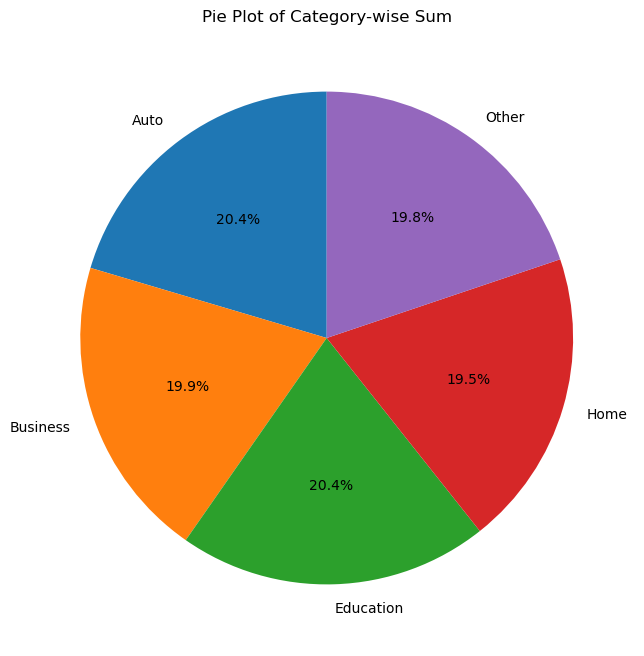

In [39]:
# Group by 'Category' and calculate the sum of 'Value' for each category
grouped_data = df.groupby('LoanPurpose')['InterestRate'].sum()

# Create a pie plot
plt.figure(figsize=(8, 8))
plt.pie(grouped_data, labels=grouped_data.index, autopct='%1.1f%%', startangle=90)

# Display the plot
plt.title('Pie Plot of Category-wise Sum')
plt.show()

# Data Prepration

In [40]:
from sklearn.preprocessing import OrdinalEncoder

In [41]:
#  Specify custom categories for the features
oe=OrdinalEncoder(categories=[["High School","Bachelor's","Master's","PhD"],
                              ['Single','Married','Divorced'],
                              ['Other','Auto','Business','Education','Home']])


In [42]:
df[['Education','MaritalStatus','LoanPurpose']]=oe.fit_transform(df[['Education','MaritalStatus','LoanPurpose']])

In [43]:
from sklearn.preprocessing import OneHotEncoder

In [44]:
oh=OneHotEncoder(drop='first',sparse=False)
# drop='first': This parameter specifies to drop the first category for each feature.
# This is often done to avoid multicollinearity in some machine learning models.

#sparse=This parameter specifies whether to return a sparse matrix (True) or a dense array (False) and dealing with large datasets with many zero values.

In [45]:
df['EmploymentType']=oh.fit_transform(df[['EmploymentType']])

In [46]:
#Replace feature string to int yes=1 and no=0.

In [47]:
df['HasMortgage']=df['HasMortgage'].replace('Yes',1)

In [48]:
df['HasMortgage']=df['HasMortgage'].replace('No',0)

In [49]:
df['HasDependents']=df['HasDependents'].replace('Yes',1)

In [50]:
df['HasDependents']=df['HasDependents'].replace('No',0)

In [51]:
df['HasCoSigner']=df['HasCoSigner'].replace('Yes',1)

In [52]:
df['HasCoSigner']=df['HasCoSigner'].replace('No',0)

In [53]:
df.head()

Age  Income  LoanAmount  CreditScore  MonthsEmployed  NumCreditLines  \
211519   34  125320       43389          847             103               2   
123285   22   24955      113715          380              34               1   
164113   26   30987       55314          341              20               2   
133070   55   34379       31407          436              14               4   
140642   66  121588      170414          531              18               3   

        InterestRate  LoanTerm  DTIRatio  Education  EmploymentType  \
211519         16.23        36      0.88        3.0             0.0   
123285         14.71        48      0.56        2.0             0.0   
164113         16.18        36      0.40        3.0             0.0   
133070         14.74        48      0.30        1.0             0.0   
140642         10.84        60      0.47        1.0             0.0   

        MaritalStatus  HasMortgage  HasDependents  LoanPurpose  HasCoSigner  \
211519            0.0            1              0          1.0            1   
123285            2.0            1              0          3.0            0   
164113            0.0            1              0          2.0            0   
133070            2.0            0              0          4.0            1   
140642            0.0            1              1          3.0            1   

        Default  
211519        0  
123285        1  
164113        1  
133070        0  
140642        0

# Handle imblanced data

In [54]:
# Synthetic Minority Over-sampling Technique (SMOTE), which is used for balancing imbalanced datasets
from imblearn.over_sampling import BorderlineSMOTE

In [55]:
smote=BorderlineSMOTE()

In [56]:
X=df.drop('Default',axis=1)
y=df['Default']
print('X is your feature matrix (the input data).')
print('y is your target variable (the output labels).')


X is your feature matrix (the input data).
y is your target variable (the output labels).


In [57]:
X,y=smote.fit_resample(X,y)

In [58]:
X.value_counts().sum()

8842

In [59]:
y.value_counts().sum()

8842

# Train Data

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
# it's set to 0.2, meaning 20% of the data will be used for testing, and the remaining 80% will be used for training.
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=43)


In [62]:
X_train.shape

(7073, 16)

In [63]:
y_train.shape

(7073,)

# Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
rf=RandomForestClassifier()

In [66]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [67]:
rf.predict(X_test)

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [68]:
y_pred1=rf.predict(X_test)

In [69]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [70]:
print('accuracy_score:',accuracy_score(y_pred1,y_test))

accuracy_score: 0.9253815715093273


In [71]:
print('classification_report',classification_report(y_pred1,y_test))

classification_report               precision    recall  f1-score   support

           0       0.95      0.90      0.93       943
           1       0.90      0.95      0.92       826

    accuracy                           0.93      1769
   macro avg       0.93      0.93      0.93      1769
weighted avg       0.93      0.93      0.93      1769



In [72]:
print('confusion_matrix',confusion_matrix(y_pred1,y_test))

confusion_matrix [[852  91]
 [ 41 785]]


In [73]:
from sklearn.model_selection import cross_val_score

In [74]:
# Cross validation for resampling procedure used to evaluate machine learning models on a limited data sample.
# helps to assess how the model will generalize to an independent dataset using K-Fold validation method.(split traing and testig data).
np.mean(cross_val_score(rf,X,y,cv=10,scoring='accuracy'))

0.9273221361556356

In [75]:
# add all classification algorithm and check auc,roc

# Hyperparameter tuning

In [76]:
# searching for the best set of hyperparameters for a machine learning model to optimize its performance.
from sklearn.model_selection import GridSearchCV


In [77]:
#A common approach is to use techniques like Grid Search or Random Search.

In [78]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30]
}

In [79]:
# Create a GridSearchCV object
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1) #n_jobs parameter controls the number of parallel jobs (or processes) to run during the hyperparameter search.

In [80]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [81]:
# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print(best_params)

{'max_depth': 30, 'n_estimators': 100}


In [82]:
# Train a model with the best hyperparameters on the entire training set
best_model = RandomForestClassifier(random_state=42, **best_params)
best_model.fit(X_train, y_train)


# the double asterisk (**) syntax in Python, which is known as "dictionary unpacking." 
# It takes a dictionary (best_params) and passes its key-value pairs as keyword arguments to the RandomForestClassifier constructor. 
# best_params contains the best hyperparameters found during the grid search.

RandomForestClassifier(max_depth=30, random_state=42)

In [83]:
# find the score best model on the test set
test_accuracy = best_model.score(X_test, y_test)

# Print the results
print("Best Hyperparameters:", best_params)
print("Test Accuracy with Best Model:", test_accuracy)


Best Hyperparameters: {'max_depth': 30, 'n_estimators': 100}
Test Accuracy with Best Model: 0.928208027133974


# GradientBoostingClassifier

In [84]:
from sklearn.ensemble import GradientBoostingClassifier

In [85]:
gb=GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,max_depth=3,random_state=42)

In [86]:
gb.fit(X_train,y_train)

GradientBoostingClassifier(random_state=42)

In [87]:
gb.predict(X_test)

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [88]:
y_pred2=gb.predict(X_test)

In [89]:
GBC=accuracy_score(y_pred2,y_test)
print("Accuracy on Test Set:",GBC)


Accuracy on Test Set: 0.9344262295081968


# DecisionTreeClassifier

In [90]:
from sklearn.tree import DecisionTreeClassifier

In [91]:
dtc=DecisionTreeClassifier(max_depth=5,random_state=43)

In [92]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=43)

In [93]:
dtc.predict(X_test)

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [94]:
y_pred3=dtc.predict(X_test)

In [95]:
DTC=accuracy_score(y_pred3,y_test)
print("Accuracy on Test Set:",DTC)


Accuracy on Test Set: 0.7586206896551724


# LogisticRegression

In [96]:
from sklearn.linear_model import LogisticRegression

In [97]:
lo=LogisticRegression(random_state=42)

In [98]:
lo.fit(X_train,y_train)

LogisticRegression(random_state=42)

In [99]:
lo.predict(X_test)

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [100]:
y_pred4=lo.predict(X_test)

In [101]:
LO=accuracy_score(y_pred4,y_test)
print("Accuracy on Test Set:",LO)


Accuracy on Test Set: 0.6958733747880158


In [105]:
from sklearn.svm import SVC

In [107]:
svc=SVC(kernel='rbf',degree=3)

In [108]:
svc.fit(X_train,y_train)

SVC()

# Receiver Operating Characteristic (ROC) Curve

In [103]:
# The ROC curve and the Area Under the Curve (AUC) are commonly used metrics in binary classification problems.Eg.Imbalance dataset


from sklearn.metrics import roc_curve, auc

# Assuming y_test contains the true labels and y_pred contains the predicted probabilities or decision values
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)

print(roc_auc)

# fpr: False Positive Rate at threshold values.
# tpr: True Positive Rate (Sensitivity or Recall) at  threshold values.
# thresholds: Threshold values used to calculate the corresponding FPR and TPR.


0.9251030337429117


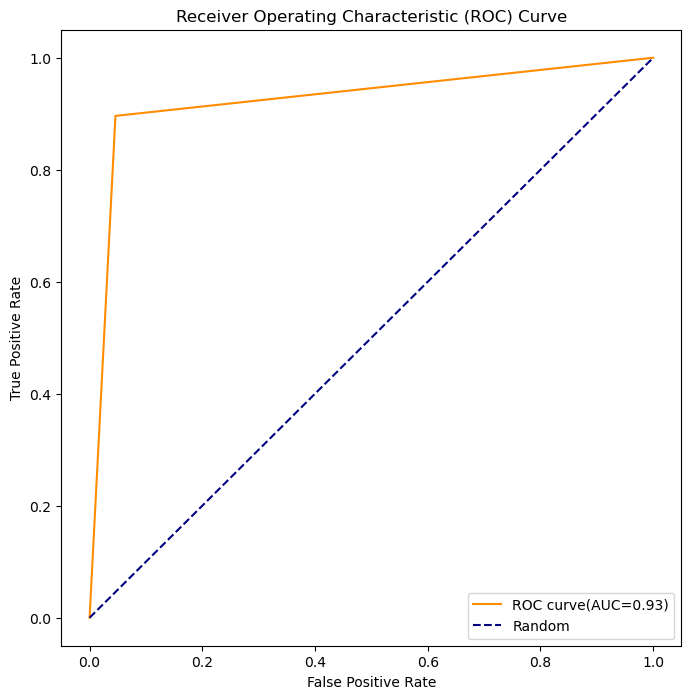

In [104]:
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr,color='darkorange',label=f'ROC curve(AUC={roc_auc:.2f})')
plt.plot([0, 1],[0, 1], color='navy',linestyle='--',label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()